In [1]:
import sqlite3
import time
import datetime
import random
from matplotlib import pyplot as plt
from datetime import datetime, timezone

from telebot.stat import Parsel, datetime_to_timestamp, setup
from telebot.stat import plot_temp_hum, plot_soil, plot_lum

In [2]:
conn = sqlite3.connect('mqtt.sqlite3')
c = conn.cursor()
print(c)

In [3]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [4]:
setup()

> За день получаем `60 * 60 * 24 / 2 = 43 200` измерений.
Для нормального отображения графика нужно не более 2000 точек (исходя из разрешения экрана FullHD)
> `43 200 / 2000 = 22`
Достаточно брать каждую 22-ю точку.
Для ровности можно брать каждую 30-ю, т.е.одно измерение в минуту

In [5]:
def statistics_for_period(date1: tuple, date2: tuple):
    
    # ts1 = datetime_to_timestamp(2022, 4, 28)
    # ts2 = datetime_to_timestamp(2022, 4, 29)
    
    ts1 = datetime_to_timestamp(date1[2], date1[1], date1[0])
    ts2 = datetime_to_timestamp(date2[2], date2[1], date2[0])
    
    print(ts1, ts2)
    
    sql = "select temp, hum, soil, lum_1, lum_2, created_at from sensors_data where created_at between " \
    + str(ts1) + " and " + str(ts2) + " and created_at % 10 = 0"
    c.execute(sql)
    data = c.fetchall()
    
    
    n_rows = len(data)
    print("Строк за выбранный период: ", n_rows)
    
    if n_rows > 0:
    
        step = int(n_rows / 500)
        print("Шаг выборки:", step)

        subset = data[::step]
        print("Размер подмножества для анализа: ", len(subset))
        p2 = Parsel(subset)
        #print(subset[:5])

        plot_temp_hum(p2, 1, 12)
        plot_soil(p2, 1, 12)
        plot_lum(p2, 1, 12)
    return

1651104000 1651190400
Строк за выбранный период:  4082
Шаг выборки: 8
Размер подмножества для анализа:  511
Plot every  43 th xtick


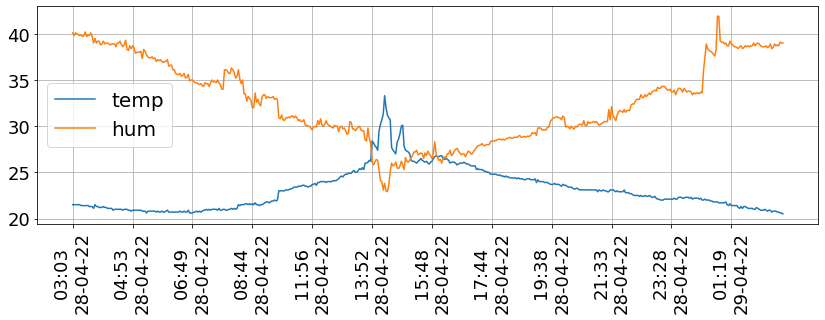

Plot every  43 th xtick


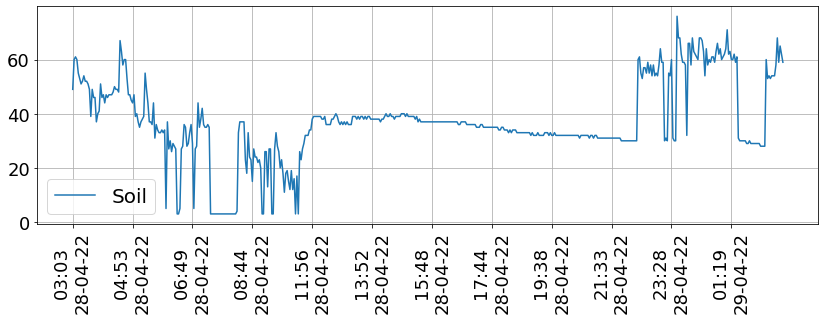

Plot every  43 th xtick


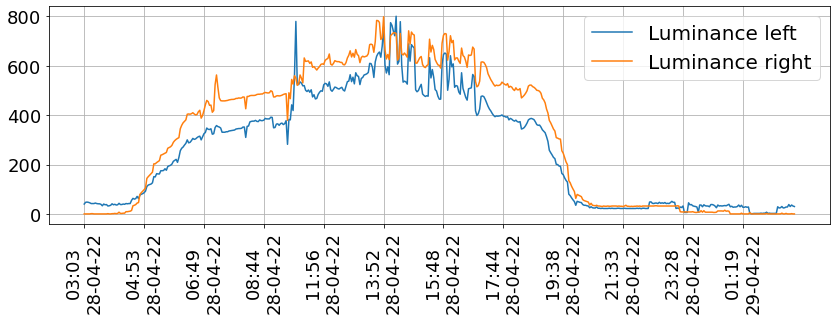

In [6]:
statistics_for_period( (28,4,2022), (29,4,2022) )

1651190400 1651276800
Строк за выбранный период:  4296
Шаг выборки: 8
Размер подмножества для анализа:  537
Plot every  45 th xtick


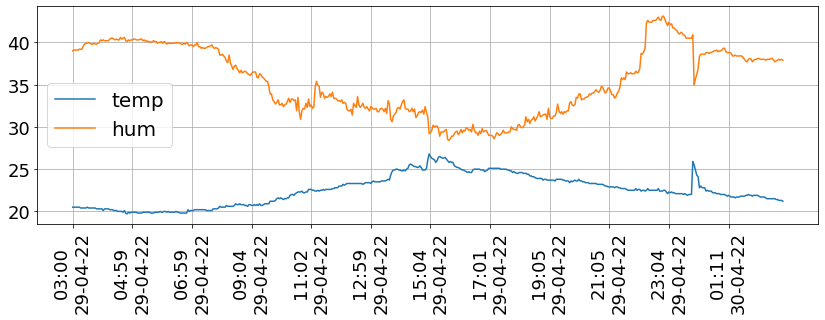

Plot every  45 th xtick


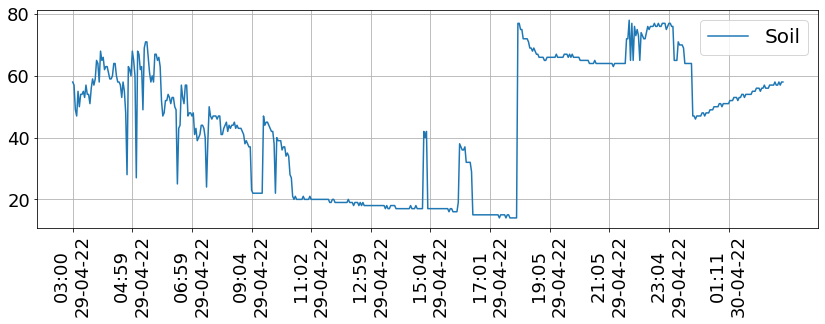

Plot every  45 th xtick


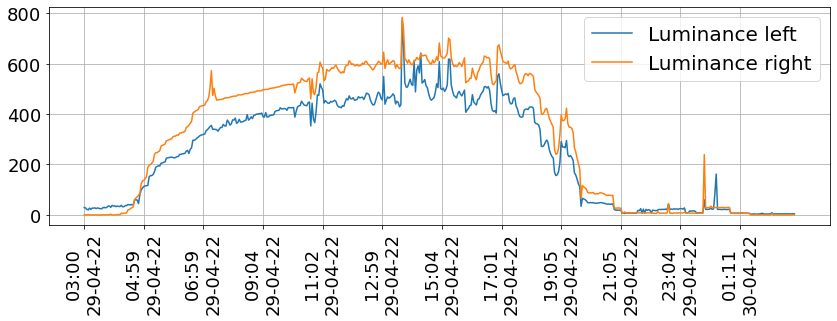

In [7]:
statistics_for_period( (29,4,2022), (30,4,2022) )

In [8]:
def read_all_from_db():
    #c.execute('SELECT * FROM sensors_data')
    c.execute('SELECT temp, hum, soil, lum_1, lum_2, created_at FROM sensors_data')
    data = c.fetchall()
    
    p = Parsel(data)
    return p

#all_parsels = read_all_from_db()
#print("Всего строк к базе данных: ", len(all_parsels.temp))
#dt = datetime.fromtimestamp(all_parsels.ts[0])
#print(dt)
#print(dt.strftime("%H:%M"))

In [9]:
#plot_lum(all_parsels, 120, 12)

In [10]:
#plot_temp_hum(all_parsels, 120, 12)

In [11]:
#plot_soil(all_parsels, 120, 12)